# Hõõrdumisega matemaatiline pendel

Hõõrdumisega matemaatilise pendli dünaamikat kirjeldab diferentsiaalvõrrand 

$$\ddot\varphi+\beta\dot\phi+k^2\sin\phi=0,$$

kus $\phi$ on nurkkaugus pendli tasakaalusasendist, $\beta\geq0$ on hõõrdetegur ja $k^2>0$ on raskuskiirenduse ja pendli pikkuse suhe. Võtame kasutusele muutujad 

$$x_1=\phi,\qquad x_2=\dot\phi.$$

Nende muutujate abil saame kirja panna dünaamilise süsteemi:

$$\begin{cases}\begin{align}
\dot{x}_1&=x_2,\\
\dot{x}_2&=-\beta x_2-k^2\sin x_1.
\end{align}\end{cases}$$

Käesolevas töölehes uurime selle dünaamilise süsteemi omadusi. Selleks leiame püsipunktid ja uurime süsteemi kvalitatiivset käitumist püsipunktide ümbruses sõltuvalt parameetritest $\beta$ ja $k$. Ühtlasi võrdleme püsipunktide ümbruses lineariseeritud süsteemi analüütiliselt arvutatud trajektoore selliste trajektooridega, mis on leitud algse mittelineaarse süsteemi numbrilisel integreerimisel.

## Sisukord

1. [Dünaamilise süsteemi püsipunktide leidmine](#pysipunktide_leidmine)<br>
2. [Püsipunkt $P_1$](#PP1)<br>
$\ $ 2.1 [Juht (1): $\beta^2>k^2$, kaks erinevat reaalset omaväärtust](#juht1)<br>
    $\qquad$ 2.1.1 [Lineariseeritud süsteemi võrdlus mittelineaarse süsteemiga](#lin_sys_vordlus1)<br>
$\ $ 2.2 [Juht (2): $\beta^2<k^2$, kaks erinevat komplekset omaväärtust](#juht2)<br>
    $\qquad$ 2.2.1 [Lineariseeritud süsteemi võrdlus mittelineaarse süsteemiga](#lin_sys_vordlus2)<br>
$\ $ 2.3 [Juht (3): $\beta^2=k^2$, kaks korduvat reaalset omaväärtust](#juht3)<br>
    $\qquad$ 2.3.1 [Lahend nilpotentse maatriksi $N$ abil](#nilpotentne)<br>
    $\qquad$ 2.3.2 [Lahend Jordani normaalkuju $J$ abil](#jordani_abil)<br>
    $\qquad$ 2.3.3 [Lineariseeritud süsteemi võrdlus mittelineaarse süsteemiga](#lin_sys_vordlus3)<br>
$\ $ 2.4 [Juht (4): $\beta=0$, kaks imaginaarset omaväärtust](#juht4)<br>
    $\qquad$ 2.4.1 [Lineariseeritud süsteemi võrdlus mittelineaarse süsteemiga](#lin_sys_vordlus4)<br>
3. [Püsipunkt $P_2$](#PP2)<br>
$\ $ 3.1 [Juht (1): $\beta\neq0$, kaks erinevat reaalset erimärgilist omaväärtust](#PP2_juht1)<br>
    $\qquad$ 3.1.1 [Lineariseeritud süsteemi võrdlus mittelineaarse süsteemiga](#lin_sys_vordlus5)<br>
4. [Lahendite käitumine püsipunktist eemal](#eemal)<br>
5. [Lisa: kolmemõõtmelised graafikud](#kolme)

In [942]:
# Impordime vajalikud paketid ja funktsioonid:

import sympy as sp
import numpy as np
# Selliselt impordituna tuleb lõikidele SymPy ja NumPy funktsioonidele vastavalt sp. ja np. ette kirjutada. 
# Muidu võiks tekkida segadus seoses sellega, kumba paketi funktsiooni tahetakse kasutada.

# Numbrilise integreerimise funktsioon:
from scipy.integrate import odeint

# Graafikute tegemiseks vajalikud paketid/käsud:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Tulemuste kuvamiseks vajalikud paketid:
from IPython.display import display, Math
sp.init_printing()

In [943]:
# Defineerime funktsiooni, mis võimaldab tulemusi mugavalt ilusal kujul kuvada:
def kuva(a, A):
    display(Math(a + " = " + sp.latex(A)))

## 1. Dünaamilise süsteemi püsipunktide leidmine <a name="pysipunktide_leidmine"></a>

Leiame kõigepealt pendlit kirjeldava dünaamilise süsteemi püsipunktid.

In [944]:
# Defineerime muutujad ja parameetrid:
sp.var('beta', nonnegative = True) 
sp.var('k', positive = True)
sp.var('x1, x2', real = True)

# Defineerime dünaamilise süsteemi:
x_d1 = x2
x_d2 = -2*beta * x2 - k**2 * sp.sin(x1)

# Püsipunktide leidmiseks lahendame mittelineaarse võrrandisüsteemi:
sp.nonlinsolve([x_d1, x_d2], x1, x2)

Näeme, et pendlit kirjeldava dünaamilise süsteemi püsipunktideks on punktid $(0,0)$, $(\pm\pi,0)$, $(\pm2\pi,0)...$ Edaspidi hakkame uurima püsipunkte $P_1=(0,0)$ ja $P_2=(\pi,0)$.

Joonistame faasiportree, kus on näha püsipunktid ja noolekesed kujutavad faasitrajektooride puutujaid:

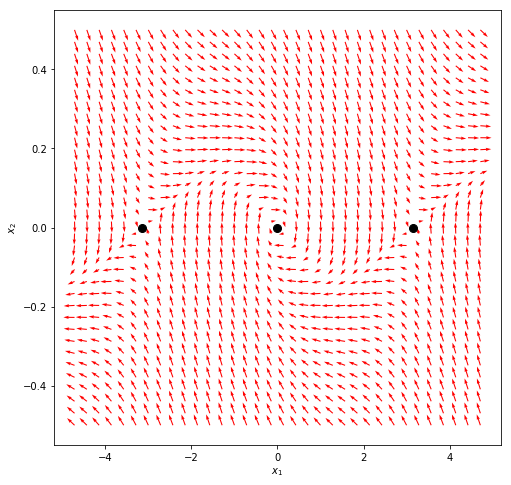

In [945]:
# Valime telgede ulatused ja parameetrite β ja k väärtused:
x_min1 = -3/2 * np.pi
x_max1 =  3/2 * np.pi
x_min2 = -1/2
x_max2 =  1/2
beta_val = 1
k_val = 2/3

# Moodustame süsteemi võrranditest maatriksi ja asendame parameetrite väärtused võrranditesse sisse:
M = sp.Matrix([x_d1.subs([(beta, beta_val), (k, k_val)]), x_d2.subs([(beta, beta_val), (k, k_val)])])

# Muudame võrrandid numbriliseks:
Mx1, Mx2 = [sp.lambdify((x1, x2), MM, 'numpy') for MM in M]

# Moodustame punktide võrgustiku:
X1 = np.linspace(x_min1, x_max1, 34)   
X2 = np.linspace(x_min2, x_max2, 34)
XX1, XX2 = np.meshgrid(X1, X2)

# Leiame noolekesed ehk tuletiste vektorid:
DX1 = Mx1(XX1, XX2)
DX2 = Mx2(XX1, XX2)

# Normeerime noolekesed:
DX1 = DX1 / np.sqrt(DX1**2 + DX2**2)
DX2 = DX2 / np.sqrt(DX1**2 + DX2**2)

# Joonistame graafiku:

# Defineerime graafiku üldised omadused:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Kuvame noolekesed:
ax.quiver(XX1, XX2, DX1, DX2, scale=40, color='r')

# Kanname graafikule püsipunktid:
plt.plot([-np.pi, 0, np.pi], [0, 0, 0], 'bo', markersize=8, color="black")

plt.show()

Graafikul oleval noolekesed kujutavad vektorit $\dot{\mathbf{x}}=\begin{pmatrix} \dot{x}_1 \\ \dot{x}_2 \end{pmatrix}$ erinevates punktides.

Faasiportreed saame esitada ka pidevate joontega, mis kujutavad erinevate trajektooride parve:

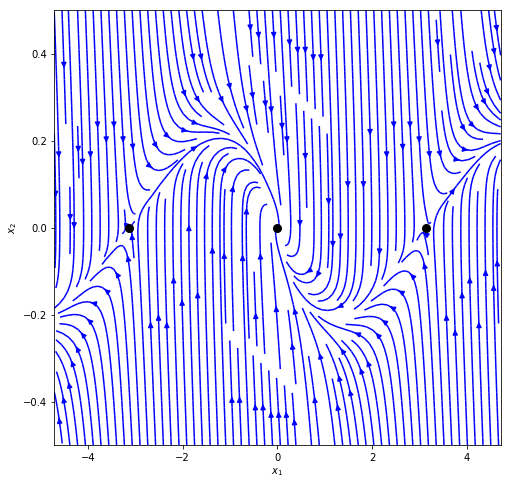

In [946]:
# Defineerime graafiku üldised omadused:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Kuvame trajektoorid:
ax.streamplot(XX1, XX2, DX1, DX2, density=[2.0, 2.0], color="blue")

# Kanname graafikule püsipunktid:
plt.plot([-np.pi, 0, np.pi], [0, 0, 0],'bo', markersize=8, color="black")

plt.show()

Edaspidi uurime lisaks faasiportreele ka algtingimustega fikseeritud trajektoore.

## 2. Püsipunkt $P_1$ <a name="PP1"></a>

Lineariseerime meie süsteemi ehk leiame lineariseeritud võrrandisüsteemi maatriksi A:

In [947]:
# Arvutame lineariseeritud süsteemi maatriksi:
A = sp.Matrix([[sp.diff(x_d1, x1), sp.diff(x_d1, x2)],
               [sp.diff(x_d2, x1), sp.diff(x_d2, x2)]])

# Kuvame tulemuse:
kuva("A", A)

<IPython.core.display.Math object>

Uurime lineariseeritud süsteemi püsipunkti $(0,0)$ ümbruses. Maatriks $A$ on siis kujul

In [948]:
# Asendame sisse x1, x2 väärtused:
A1 = A.subs([(x1, 0), (x2, 0)])

# Kuvame tulemuse:
kuva("A_1", A1)

<IPython.core.display.Math object>

Leiame maatriksi $A_1$ omaväärtused $\lambda_1$ ja $\lambda_2$. Selleks peame lahendama karakteristliku võrrandi $\det(A_1-\lambda I)=0$:

In [949]:
# Defineerime omaväärtuse muutujana l:
sp.var('l', real = True)

# Koostame karakteristliku võrrandi:
kar = sp.det(A1 - l * sp.eye(2))

# Lahendame selle ja esitame lahendid:
l_lah = sp.solve(kar, l)
kuva("λ", l_lah)

# Esitame omaväärtused eraldi:
l1 = l_lah[0]
l2 = l_lah[1]
kuva("λ_1", l1)
kuva("λ_2", l2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Omaväärtused saame lasta ka SymPyl otse välja arvutada:

In [950]:
# Arvutame omaväärtused:
l_lah = list(A1.eigenvals())
kuva("\lambda", l_lah)

# Lihtsustame neid:
l1 = l_lah[0].simplify()
l2 = l_lah[1].simplify()

# Kuvame tulemused:
kuva("λ_1", l1)
kuva("λ_2", l2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Näeme, et lähemalt peame uurima nelja juhtu: (1) $\beta^2>k^2$, (2) $\beta^2<k^2$, (3) $\beta^2=k^2$, (4) $\beta=0$.

### 2.1 Juht (1): $\beta^2>k^2$, kaks erinevat reaalset omaväärtust <a name="juht1"></a>

Kui $\beta^2>k^2$, siis on meil kaks erinevat reaalset negatiivset omaväärtust. Sellisel juhul püsipunkt on atraktor ja süsteemi faasiportreeks on stabiilne sõlm.

Leiame maatriksi $A_1$ omavektorid $v_1$ ja $v_2$:

In [951]:
# Arvutame omavektorid:
v = A1.eigenvects()
kuva("v", v)

# Eraldame saadud tulemusest omavektorid v1 ja v2:
v1 = v[0][2][0].applyfunc(sp.simplify)
v2 = v[1][2][0].applyfunc(sp.simplify)
kuva("v_1", v1)
kuva("v_2", v2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Kontrollime, et leitud omavektorid $v_1$ ja $v_2$ on lineaarselt sõltumatud. Selleks moodustame neist maatriksi ja arvutame selle determinandi, mis ei tohi olla 0:

In [952]:
# Moodustame vektoritest v1 ja v2 maatriksi V:
V = sp.Matrix([[v1[0], v2[0]],
              [v2[1], v2[1]]])
kuva("V", V)

# Arvutame selle determinandi:
kuva("det(V)", sp.det(V).simplify())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Näeme, et maatriksi $V$ determinant tõepoolest ei ole 0 ehk vektorid $v_1$ ja $v_2$ on lineaarselt sõltumatud. Leiame nüüd maatriksi $V$ pöördmaatriksi:

In [953]:
# Arvutame maatriksi V pöördmaatriksi Vp:
Vp = V ** (-1)
Vp = Vp.applyfunc(sp.simplify)
kuva("V^{-1}", Vp)

# Kontrollime, et tegemist on pöördmaatriksiga:
kuva("V \cdot V^{-1}", (V * Vp).applyfunc(sp.simplify))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Järgmisena defineerime normaalkujul süsteemi lahendite maatriksi $B$ ja algtingimuste vektori $\textbf{x}_{alg}$:

In [954]:
# Defineerime muutujad:
sp.var('x_01, x_02, t', real = True)

# Defineerime süsteemi lahendite maatriksi B:
B = sp.Matrix([[sp.exp(l1 * t), 0],
               [0, sp.exp(l2 * t)]])
kuva("B", B)

# Defineerime algtingimuste vektori x_alg:
x_alg = sp.Matrix([x_01, x_02])
kuva("x_{alg}", x_alg)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Süsteemi lahendiks on seega vektor
$$\mathbf x(t) = V\cdot B\cdot V^{-1} \cdot \mathbf x_{alg}.$$

In [955]:
# Leiame lahendite vektori:
xt = V * B * Vp * x_alg
xt = xt.applyfunc(sp.simplify)
kuva("x(t)", xt)

<IPython.core.display.Math object>

Põhilist huvi pakub antud juhul muidugi ainult lahend $x_1(t)$, sest $x_2(t)$ on $x_1(t)$ ajaline tuletis:

In [956]:
kuva("x_2(t) - \dot{x}_1(t)", sp.simplify(xt[1] - sp.diff(xt[0], t)))

<IPython.core.display.Math object>

#### 2.1.1 Lineariseeritud süsteemi võrdlus mittelineaarse süsteemiga <a name="lin_sys_vordlus1"></a>

Võrdleme lineariseeritud võrrandite analüütilist lahendit algse mittelineaarse võrrandi numbrilise lahendiga. Selleks määrame kõigepealt võrrandi parameetrid, lahendi algtingimused ja ajalise kestuse, mille jooksul lahendit jälgime.

In [957]:
beta_val = 2
k_val = 1.5
x_01_val = 0.3
x_02_val = 0.3
t_min = 0
t_max = 10
x_min1 = -0.6
x_max1 =0.6
x_min2 = -0.6
x_max2 = 0.6

Defineerime funktsiooni, mis joonistab trajektooride parve:

In [958]:
def trajektoorid(x_d1, x_d2, beta_val, k_val, x_min1, x_max1, x_min2, x_max2):
    
    # Asendame võrranditesse sisse parameetrite väärtused:
    x_d1_sol = x_d1.subs([(beta, beta_val), (k, k_val)])
    x_d2_sol = x_d2.subs([(beta, beta_val), (k, k_val)])

    # Muudame võrrandid numbriliseks:
    x_d1_num = sp.lambdify((x1, x2), x_d1_sol, 'numpy') 
    x_d2_num = sp.lambdify((x1, x2), x_d2_sol, 'numpy')
    
    # Moodustame punktide võrgustiku:
    X1 = np.linspace(x_min1, x_max1, 34)   
    X2 = np.linspace(x_min2, x_max2, 34)
    XX1, XX2 = np.meshgrid(X1, X2)

    # Leiame noolekesed ehk tuletise vektorid:
    DX1 = x_d1_num(XX1, XX2)
    DX2 = x_d2_num(XX1, XX2)
    
    # Normeerime noolekesed:
    DX1 = DX1 / np.sqrt(DX1**2 + DX2**2)
    DX2 = DX2 / np.sqrt(DX1**2 + DX2**2)
    
    # Kuvame trajektoorid:
    ax.streamplot(X1, X2, DX1, DX2, density=[2.0, 2.0], color="blue")
    
    return

Defineerime funktsiooni, mis joonistab lineariseeritud süsteemi trajektoori:

In [959]:
def lineaarne(xt, beta_val, k_val, x_01_val, x_02_val, t_min, t_max):
    
    # Asendame lahendi vektorisse xt parameetrite väärtused ja algtingimused:
    xt_sol = xt.subs([(beta, beta_val), (k, k_val), (x_01, x_01_val), (x_02, x_02_val)]) 

    # Moodustame ajahetkede hulga:
    p = np.linspace(t_min, t_max, 1001)

    # Moodustame tühjad vektorid:
    xt_1 = np.empty(1001)
    xt_2 = np.empty(1001)

    # Arvutame süsteemi olekud erinevatel ajahetkedel:
    for i in range(len(p)):
        xt_1[i] = xt_sol[0].subs(t, p[i])
        xt_2[i] = xt_sol[1].subs(t, p[i]) 

    # Esitame analüütiliselt arvutatud trajektoori:
    ax.plot(xt_1, xt_2, lw = 2, color = "g", label = "lineaarse süsteemi trajektoor")          
    
    return

Defineerime funktsiooni, mis joonistab mittelineaarse süsteemi trajektoori:

In [960]:
def mittelineaarne(x_d1, x_d2, beta_val, k_val, x_01_val, x_02_val, t_min, t_max):

    # Asendame võrranditesse sisse parameetrite väärtused:
    x_d1_sol = x_d1.subs([(beta, beta_val), (k, k_val)])
    x_d2_sol = x_d2.subs([(beta, beta_val), (k, k_val)])

    # Muudame võrrandid numbriliseks:
    x_d1_num = sp.lambdify((x1, x2), x_d1_sol, 'numpy') 
    x_d2_num = sp.lambdify((x1, x2), x_d2_sol, 'numpy')
    
    # Defineerime funktsioonina süsteemi dünaamika:
    def dyn_sys(S, N):
        x1d = x_d1_num(S[0], S[1])
        x2d = x_d2_num(S[0], S[1])
        dx1dx2 = [x1d, x2d]
        return dx1dx2

    # Defineerime algtingimuste järjendi:
    S0 = (x_01_val, x_02_val)

    # Moodustame ajahetkede hulga:
    N = np.linspace(t_min, t_max, 1001)

    # Integreerime dünaamilist süsteemi ajas tagasi:
    sol = odeint(dyn_sys, S0, N)

    # Eraldame x1 ja x2 väärtused:
    sol_x1= sol[:, 0]
    sol_x2= sol[:, 1]
    
    # Esitame numbriliselt arvutatud trajektoori:
    ax.plot(sol_x1, sol_x2, linestyle = "-.", lw = 2, color = 'b', label = "mittelineaarse süsteemi trajektoor")
    
    return

Defineerime funktsiooni, mis joonistab dünaamilise süsteemi faasiportree:

In [961]:
def noolekesed(x_d1, x_d2, beta_val, k_val, x_min1, x_max1, x_min2, x_max2):
    
    # Asendame võrranditesse sisse parameetrite väärtused:
    x_d1_sol = x_d1.subs([(beta, beta_val), (k, k_val)])
    x_d2_sol = x_d2.subs([(beta, beta_val), (k, k_val)])

    # Muudame võrrandid numbriliseks:
    x_d1_num = sp.lambdify((x1, x2), x_d1_sol, 'numpy') 
    x_d2_num = sp.lambdify((x1, x2), x_d2_sol, 'numpy')
    
    # Moodustame punktide võrgustiku:
    X1 = np.linspace(x_min1, x_max1, 34)   
    Y2 = np.linspace(x_min2, x_max2, 34)
    XX1, XX2 = np.meshgrid(X1, Y2)

    # Leiame noolekesed ehk tuletise vektorid:
    DX1 = x_d1_num(XX1, XX2)
    DX2 = x_d2_num(XX1, XX2)
    
    # Normeerime noolekesed:
    DX1 = DX1 / np.sqrt(DX1**2 + DX2**2)
    DX2 = DX2 / np.sqrt(DX1**2 + DX2**2)
    
    # Esitame dünaamilise süsteemi faasiportree:
    ax.quiver(XX1, XX2, DX1, DX2, scale=40, color='r')
    
    return

Esitame võimalike trajektooride parve antud algtingimuste korral:

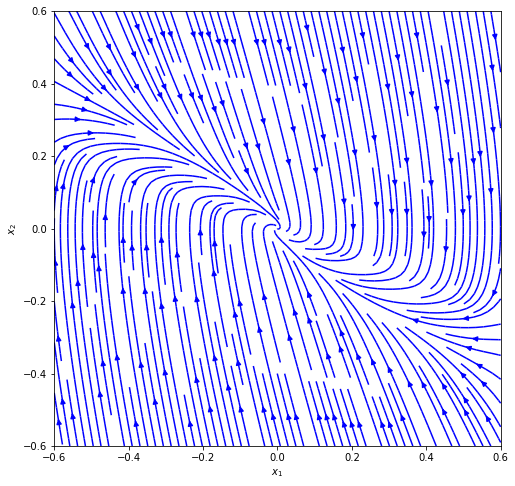

In [962]:
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(111)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_xlim(x_min1, x_max1)
ax.set_ylim(x_min2, x_max2)
ax.grid

# Esitame trajektooride parve:
trajektoorid(x_d1, x_d2, beta_val, k_val, x_min1, x_max1, x_min2, x_max2)

plt.show()

Esitame nii lineariseeritud kui ka mittelineaarse süsteemi fikseeritud trajektoori ühel graafikul, taustaks tuttavad noolekesed:

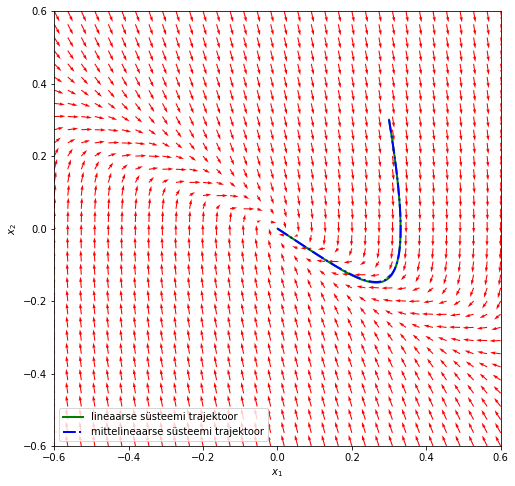

In [963]:
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(111)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_xlim(x_min1, x_max1)
ax.set_ylim(x_min2, x_max2)
ax.grid


# Esitame analüütiliselt arvutatud trajektoori:
lineaarne(xt, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)                       

# Esitame numbriliselt arvutatud trajektoori:
mittelineaarne(x_d1, x_d2, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)            

# Esitame dünaamilise süsteemi faasiportree:
noolekesed(x_d1, x_d2, beta_val, k_val, x_min1, x_max1, x_min2, x_max2)

# Kuvame legendi:
ax.legend(loc = 3)

plt.show()

Näeme, et tulemused klapivad väga hästi.

Õpetlik on graafikule kanda ka lineariseeritud süsteemi omavektorite sihiga määratud jooned. Need moodustavad separaatriksid, mis jagavad lahendid erinevatesse klassidesse. Kui $q$ on joone parameeter ja joon läbib koordinaatide alguspunkti, siis selle võrrand on $r=qv$, kus $r$ on joone vektor (annab joone punktide koordinaadid) ning $v$ on etteantud vektor (joone puutujasihiline vektor), antud juhul maatriksi $A$ omavektor.

Defineerime omavektorite sihilise joone joonistava funktsiooni:

In [964]:
def omavektor(v, beta_val, k_val, x_min, x_max):
    
    # Asendame omavektoritesse v1 ja v2 parameetrite väärtused:
    v_fix = v.subs([(beta, beta_val), (k, k_val)])

    # Anname väärtused joone parameetrile q:
    q = np.linspace(x_min, x_max, 10) 

    # Arvutame punktid esimesele omavektorile vastava joonel:
    r1 = v_fix[0] * q
    r2 = v_fix[1] * q
    
    # Esitame omavektorile vastava joone:
    plt.plot(r1, r2, lw = 2)

    return

Esitame graafiku:

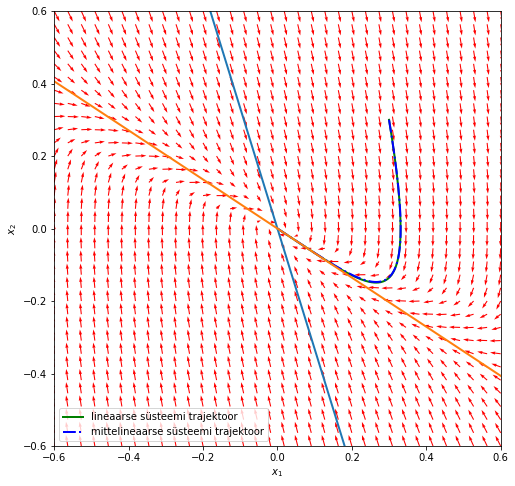

In [965]:
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(111)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_xlim(x_min1, x_max1)
ax.set_ylim(x_min2, x_max2)
ax.grid

# Esitame analüütiliselt arvutatud trajektoori:
lineaarne(xt, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)                       

# Esitame numbriliselt arvutatud trajektoori:
mittelineaarne(x_d1, x_d2, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)            

# Esitame dünaamilise süsteemi faasiportree:
noolekesed(x_d1, x_d2, beta_val, k_val, x_min1, x_max1, x_min2, x_max2)



# Esitame omavektorite sihile vastavad jooned:
omavektor(v1, beta_val, k_val, x_min1, x_max1)
omavektor(v2, beta_val, k_val, x_min1, x_max1)

# Kuvame legendi:
ax.legend(loc = 3)

plt.show()

Näeme, et lahendid jagunevad kahte klassi. Kui algtingimused on sobivad, siis liigub pendel läbi tasakaaluasendi $(x_2=0)$, pöördub tagasi ning jääb liginema tasakaaluasendile. Need lahendid asuvad separaatriksite vahel selles sektoris, kus on antud numbriline lahend, ning tolle vastassektoris. Teise klassi moodustavad lahendid, kus pendel tasakaaluasendit ei läbigi vaid sumbumise mõjul sellele ainult aeglustuvalt ligineb.

Koostame graafiku ka otsese võnkumise jaoks ehk esitame pendli nurkkauguse sõltuvuse ajast (eespool toodud parameetrite ja algtingimuste korral):

In [966]:
# Defineerime funktsiooni, mis joonistab ϕ(t) graafiku lineaarse süsteemi põhjal:

def ajast_lin(xt, beta_val, k_val, x_01_val, x_02_val, t_min, t_max):
    
    # Asendame lahendi vektori komponenti x1 parameetrite väärtused ja algtingimused:
    xt_sol = xt.subs([(beta, beta_val), (k, k_val), (x_01, x_01_val), (x_02, x_02_val)]) 

    # Moodustame ajahetkede hulga:
    p = np.linspace(t_min, t_max, 1001)

    # Moodustame tühja vektori:
    xt_1 = np.empty(1001)

    # Arvutame süsteemi olekud erinevatel ajahetkedel:
    for i in range(len(p)):
        xt_1[i] = xt_sol[0].subs(t, p[i]) 

    # Esitame analüütiliselt arvutatud graafiku:
    ax.plot(p, xt_1, lw = 2, color = "g", label = "lineaarse süsteemi $\phi(t)$")          
    
    return

In [967]:
# Defineerime funktsiooni, mis joonistab ϕ(t) graafiku mittelineaarse süsteemi põhjal:

def ajast_mittelin(x_d1, x_d2, beta_val, k_val, x_01_val, x_02_val, t_min, t_max):

    # Asendame võrranditesse sisse parameetrite väärtused:
    x_d1_sol = x_d1.subs([(beta, beta_val), (k, k_val)])
    x_d2_sol = x_d2.subs([(beta, beta_val), (k, k_val)])

    # Muudame võrrandid numbriliseks:
    x_d1_num = sp.lambdify((x1, x2), x_d1_sol, 'numpy') 
    x_d2_num = sp.lambdify((x1, x2), x_d2_sol, 'numpy')
    
    # Defineerime funktsioonina süsteemi dünaamika:
    def dyn_sys(S, N):
        x1d = x_d1_num(S[0], S[1])
        x2d = x_d2_num(S[0], S[1])
        dx1dx2 = [x1d, x2d]
        return dx1dx2

    # Defineerime algtingimuste järjendi:
    S0 = (x_01_val, x_02_val)

    # Moodustame ajahetkede hulga:
    N = np.linspace(t_min, t_max, 1001)

    # Integreerime dünaamilist süsteemi ajas tagasi:
    sol = odeint(dyn_sys, S0, N)

    # Eraldame x1 ja x2 väärtused:
    sol_x1= sol[:, 0]
    sol_x2= sol[:, 1]
    
    # Esitame numbriliselt arvutatud graafiku:
    ax.plot(N, sol_x1, lw = 2, linestyle = "-.", color = 'blue', label = "mittelineaarse süsteemi $\phi(t)$")
    
    return

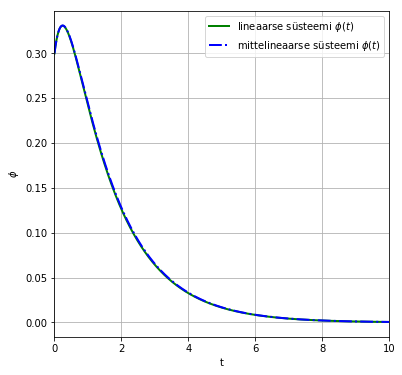

In [968]:
# Joonistame võnkumise graafiku, kasutades üleval defineeritud funktsioone:

fig = plt.figure(figsize = (6, 6))

ax = fig.add_subplot(111)
ax.set_xlabel("t")
ax.set_ylabel("$\phi$")
ax.set_xlim(t_min, t_max)
ax.grid()

# Esitame analüütiliselt arvutatud graafiku:
ajast_lin(xt, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)   

# Esitame numbriliselt arvutatud graafiku:
ajast_mittelin(x_d1, x_d2, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)

# Kuvame legendi:
ax.legend(loc = 1)

plt.show()

Võnkumise graafik on ootuspärane, kuna meil oli tingimuseks, et $\beta^2>k^2$ - hõõrdetegur on suurem kui raskuskiirenduse ja pendli pikkuse suhe ning võnkumine sumbub kiiresti.

### 2.2 Juht (2): $\beta^2<k^2$, kaks erinevat kompleksset omaväärtust <a name="juht2"></a>

Nüüd on meil kaks kompleksset omaväärtust, mis on teineteise kaaskompleksid. Omaväärtuste reaalosa on negatiivne, seega püsipunkt on atraktor ja süsteemi faasiportreeks on stabiilne fookus.

Omavektorid on samad, mis enne, aga tähistame need nüüd kujul $w_1$ ja $w_2$:

In [969]:
w1 = v1 
w2 = v2
kuva("w_1", w1)
kuva("w_2", w2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Neist tuleb nüüd moodustada maatriks $P$, eraldades omavektori $w_1$ imaginaar- ja reaalosa. Üldjuhul on on omavektori komponendid kujul

$$\frac{a+ib}{c+id}.$$
Kuidas eraldada siit imaginaar- ja reaalosa?

In [970]:
# Defineerime parameetrid:
sp.var('a, b, c, d', real = True)

# Defineerime üleval toodud avaldise:
komp = (a + sp.I * b) / (c + sp.I * d)

# Eraldame sellest reaal- ja imaginaarosa:
reaal = sp.re(komp).simplify()
imag  = sp.im(komp).simplify()

# Kuvame tulemused:
kuva("reaalosa", reaal)
kuva("imaginaarosa", imag)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Kontrollime, et nende summa annab tõesti algse kompleksarvu:

In [971]:
sp.simplify(reaal + sp.I * imag - komp)

Eraldame omavektorist $w_1$ reaalse ja imaginaarse osa, kasutades reaalset abimuutujat $\chi=\sqrt{-\beta^2+k^2}$:

In [972]:
# Defineerime abimuutuja χ:
sp.var('chi', real = True)

# Asendame selle vektorisse w1 kujul -i*χ:
wc = w1.subs(sp.sqrt(beta**2 - k**2), -sp.I * chi)
kuva("w_c", wc)

# Eraldame sellest reaal- ja imaginaarosa:
uc = sp.re(wc)
vc = sp.im(wc)
kuva("u_c", uc)
kuva("v_c", vc)

# Asendame χ avaldise tagasi sisse:
u = uc.subs(chi, sp.sqrt(-beta**2 + k**2))
v = vc.subs(chi, sp.sqrt(-beta**2 + k**2))
kuva("u", u)
kuva("v", v)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Tõesti, $u+iv$ annab algse kompleksse vektori $w_1$, kui aitame SymPyl meeles pidada, et $i\sqrt{-\beta^2+k^2}=\sqrt{\beta^2-k^2}$.

In [973]:
# Defineerime vektori w = u + iv:
w = u + sp.I * v

# Asendame üleval toodud ruutjuure:
w = sp.simplify(w.subs(sp.I * sp.sqrt(-beta**2 + k**2), sp.sqrt(beta**2 - k**2)))
kuva("w", w)

# Kontrollime, et w = w1:
kuva("w  - w_1", w - w1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Niisiis, moodustame maatriksi $P$, mille veergudesse paneme kompleksse omavektori $w$ imaginaarse ja reaalse osa:

In [974]:
# Defineerime maatriksi P:
P = sp.Matrix([[v[0], u[0]],
               [v[1], u[1]]])
kuva("P", P)

# Arvutame P pöördmaatriksi:
P_p = P**(-1)
kuva("P^{-1}", P_p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Lahendi kirjapanekuks on vaja eraldada ka omaväärtuse $\lambda_1$ reaalne ja imaginaarne osa:

In [975]:
# Kuvame omaväärtuse λ1:
kuva("λ1", l1)

# Asendame sellesse eespool kasutatud ruutjuure:
l1_c = l1.subs(sp.sqrt(beta**2 - k**2), sp.I * sp.sqrt(-beta**2 + k**2))
kuva("\lambda_{1c}", l1_c)

# Eraldame reaalse ja imaginaarse osa:
l1_im = l1_c.coeff(sp.I)
l1_re = sp.simplify(l1_c - sp.I * l1_im)
kuva("λ_{1\_re}", l1_re)
kuva("λ_{1\_im}", l1_im)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Samuti läheb tarvis maatriksit $B_c$ ja algtingimuste vektorit $x_{alg}$:

In [976]:
# Defineerime maatriksi B:
B_c = sp.exp(l1_re * t) * sp.Matrix([[sp.cos(l1_im * t), sp.sin(l1_im * t)],
                                     [-sp.sin(l1_im * t), sp.cos(l1_im * t)]])
kuva("B_c", B_c)

# Defineerime algtingimuste vektori x_alg:
x_alg = sp.Matrix([x_01, x_02])
kuva("x_{alg}", x_alg)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Lahendiks on siis vektor $x_c(t)=P\cdot B_c \cdot P^{-1} \cdot x_{alg}$:

In [977]:
# Arvutame vektori xt_c:
xt_c = P * B_c * P_p * x_alg

# Lihtsustame ja kuvame selle:
xt_c = xt_c.applyfunc(sp.simplify)
kuva("x_c(t)", xt_c)

<IPython.core.display.Math object>

#### 2.2.1 Lineariseeritud süsteemi võrdlus mittelineaarse süsteemiga <a name="lin_sys_vordlus2"></a>

Võrdleme lineariseeritud võrrandite analüütilist lahendit algse mittelineaarse võrrandi numbrilise lahendiga. Selleks määrame kõigepealt võrrandi parameetrid, lahendi algtingimused ja ajalise kestuse, mille jooksul lahendit jälgime.

In [978]:
beta_val = 0.5
k_val = 1.5
x_01_val = 0.3
x_02_val = 0.3
t_min = 0
t_max = 10
x_min1 = -0.6
x_max1 =0.6
x_min2 = -0.6
x_max2 = 0.6

Esitame võimalike trajektoorid parve antud algtingimuste korral:

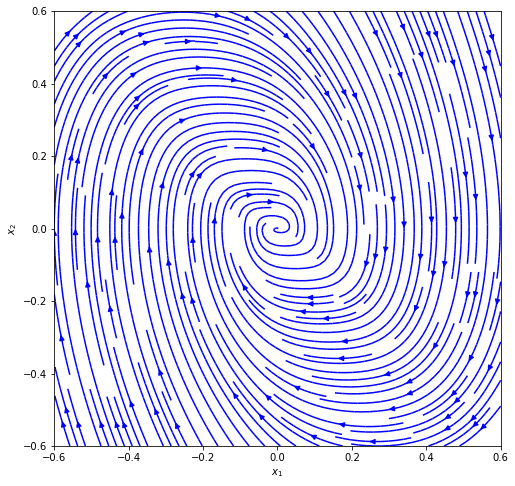

In [979]:
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(111)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_xlim(x_min1, x_max1)
ax.set_ylim(x_min2, x_max2)
ax.grid

# Esitame trajektooride parve:
trajektoorid(x_d1, x_d2, beta_val, k_val, x_min1, x_max1, x_min2, x_max2)

plt.show()

Esitame nii lineariseeritud kui ka mittelineaarse süsteemi fikseeritud trajektoori ühel graafikul, taustaks tuttavad noolekesed:

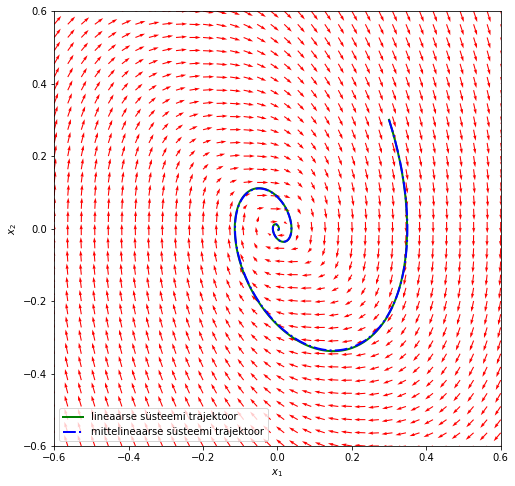

In [980]:
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(111)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_xlim(x_min1, x_max1)
ax.set_ylim(x_min2, x_max2)
ax.grid

# Esitame analüütiliselt arvutatud trajektoori:
lineaarne(xt_c, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)                       

# Esitame numbriliselt arvutatud trajektoori:
mittelineaarne(x_d1, x_d2, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)            

# Esitame dünaamilise süsteemi faasiportree:
noolekesed(x_d1, x_d2, beta_val, k_val, x_min1, x_max1, x_min2, x_max2)

# Kuvame legendi:
ax.legend(loc = 3)

plt.show()

Näeme, et tulemused klapivad väga hästi.

Omavektorid on komplekssed, neid joonisele kanda ei saa. Tähendus on ka selge: puuduvad lahendeid klassideks jagavad separaatriksid. Lahendid moodustavad ühe klassi - pendel võngub ajas väheneva amplituudiga.

Koostame graafiku ka otsese võnkumise jaoks ehk esitame pendli nurkkauguse sõltuvuse ajast (eespool toodud parameetrite ja algtingimuste korral):

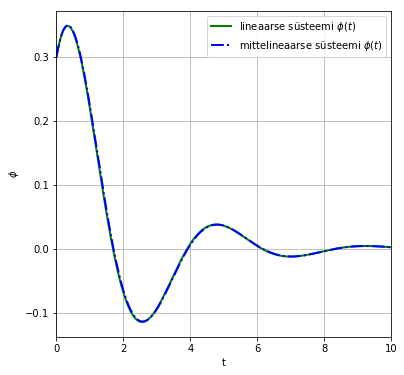

In [981]:
fig = plt.figure(figsize = (6, 6))

ax = fig.add_subplot(111)
ax.set_xlabel("t")
ax.set_ylabel("$\phi$")
ax.set_xlim(t_min, t_max)
ax.grid()

# Esitame analüütiliselt arvutatud graafiku:
ajast_lin(xt_c, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)   

# Esitame numbriliselt arvutatud graafiku:
ajast_mittelin(x_d1, x_d2, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)

# Kuvame legendi:
ax.legend(loc = 1)

plt.show()

Võnkumise graafik on ootuspärane, kuna meil oli tingimuseks, et $\beta^2<k^2$ - hõõrdetegur on väiksem kui raskuskiirenduse ja pendli pikkuse suhe ning võnkumine sumbub ikka, aga aeglaselt.

### 2.3 Juht (3): $\beta^2=k^2$, kaks korduvat reaalset omaväärtust <a name="juht3"></a>

Kui $\beta^2=k^2$, siis on meil kaks korduvat reaalset negatiivset omaväärtust. Seega püsipunkt on atraktor ja süsteemi faasiportreeks on kõdunud stabiilne sõlm.

Tähistame maatriksit $A_1$ nüüd kujul $A_k$:

In [982]:
A_k = A1.subs(beta, k)
kuva("A_k", A_k)

<IPython.core.display.Math object>

Leiame selle omaväärtused ja omavektorid:

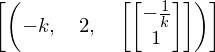

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [983]:
# Arvutame omaväärtused ja omavektorid:
omav_k = A_k.eigenvects()
display(omav_k)

# Eraldame saadud hulgast omaväärtused:
l1_k = omav_k[0][0]
l2_k = l1_k
kuva("λ_{1k}", l1_k)
kuva("λ_{2k} = λ_{1k}", l2_k)

# Eraldame saadud hulgast omavektorid:
v_1k = omav_k[0][2][0]
v_2k = v_1k
kuva("v_{1k}", v_1k)
kuva("v_{2k} = v_{1k}", v_2k)

Maatriksil $A_k$ on kaks korduvat omaväärtust ja ainult üks omavektor.

Analüütilise lahendi kirjapanekuks on kaks teed: (a) nilpotentse maatriksi $N$ abil võib (b) maatriksi $A$ Jordani normaalkuju $J$ abil.

#### 2.3.1 Lahend Nilpotentse maatriksi $N$ abil <a name="nilpotentne"></a>

Leiame üldistatud omavektori $v$ valemist $(A-\lambda I)^2v=0$:

In [984]:
# Defineerime tundmatu vektori v:
sp.var('v1, v2')
v = sp.Matrix([v1, v2])

# Defineerime üleval toodud avaldise:
eq = (A_k - l1_k * sp.eye(2))**2 * v

# Lahendame üleval toodud võrrandisüsteemi vektori v komponentide suhtes:
v_lah = list(sp.linsolve([eq[0], eq[1]], v1, v2))

# Eraldame lahendi ja moodustame nendest vektori:
v1_lah = v_lah[0][0]
v2_lah = v_lah[0][1]
v_k = sp.Matrix([v1_lah, v2_lah])

# Kuvame tulemuse:
kuva("v_k", v_k)

<IPython.core.display.Math object>

Siin parameetrid $v_1$ ja $v_2$ tuleb määrata nii, et saadud üldistatud omavektor $v_k$ ning algne omavektor $v_{1k}$ oleksid lineaarselt sõltumatud. Teisisõnu, nendest moodustatud maatriksi $P_{ka}$ determinant peab olema nullist erinev.

In [985]:
# Defineerime maatriksi P_ka:
P_ka = sp.Matrix([[v_1k[0], v_k[0]],
                  [v_1k[1], v_k[1]]])
kuva("P_{ka}", P_ka)

# Arvutame determinandi:
det_P_ka = sp.det(P_ka)
kuva("det(P_{ka})", det_P_ka)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Võtame kõige lihtsamalt, et $v_1=1$, $v_2=0$:

In [986]:
# Asendame väärtused sisse:
P_k = P_ka.subs([(v1, 1), (v2, 0)])
kuva("P_k", P_k)

# Arvutame pöördmaatriksi:
P_kp = P_k**(-1)
kuva("P_k^{-1}", P_kp)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Olgu meil veel maatriks $L_k$, mille diagonaalil on omaväärtused:

In [987]:
L_k = sp.Matrix([[l1_k, 0],
                 [0, l1_k]])
kuva("L_k", L_k)

<IPython.core.display.Math object>

Siis saame leida maatriksi $S_k=P_k L_k P_k^{-1}$:

In [988]:
S_k = P_k * L_k * P_kp
kuva("S_k", S_k)

<IPython.core.display.Math object>

ja maatriksi $N_k=A_k-S_k$:

In [989]:
N_k = A_k - S_k
kuva("N_k", N_k)

<IPython.core.display.Math object>

kusjuures $S_k N_k = N_k S_k$:

In [990]:
kuva("S_k N_k", S_k * N_k)
kuva("S_k N_k - N_k S_k", S_k * N_k - N_k * S_k)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

ning $N_k$ on 2. järku nilpotentne ehk $N_k^2=0$:

In [991]:
kuva("N_k^2", N_k**2)

<IPython.core.display.Math object>

Lahendi kirjapanekuks on vaja maatriksit, mille diagonaalil on eksponendid omaväärtuste ja aja korrutisest:

In [992]:
L_ek = sp.Matrix([[sp.exp(l1_k * t), 0 ],
                    [0, sp.exp(l1_k * t)]])
kuva("L_{ek}", L_ek)

<IPython.core.display.Math object>

Lahend on siis järgmine:

In [993]:
xt_k = (P_k * L_ek * P_kp * (sp.eye(2) + t * N_k) * x_alg).applyfunc(sp.expand)
kuva("x_k(t)", xt_k)

<IPython.core.display.Math object>

Kontrollime, et teine rida on esimese tuletis:

In [994]:
sp.simplify(xt_k[1] - sp.diff(xt_k[0], t))

#### 2.3.2 Lahend Jordani normaalkuju $J$ abil <a name="jordani_abil"></a>

Üldistatud omavektor $v_k$ on meil juba leitud:

In [995]:
kuva("v_k", v_k)

<IPython.core.display.Math object>

Moodustame omavektorist ja üldistatud omavektorist maatriksi $Q_{ka}$:

In [996]:
Q_ka = sp.Matrix([[v_1k[0], v_k[0]],
                  [v_1k[1], v_k[1]]])
kuva("Q_{ka}", Q_ka)

# Arvutame determinandi:
Q_ka_det = sp.det(Q_ka)
kuva("det(Q_{ka})", Q_ka_det)

# Arvutame pöördmaatriksi:
Q_kap = (Q_ka**(-1)).applyfunc(sp.simplify)
kuva("Q_{ka}^{-1}", Q_kap)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Jordani normaalkuju tuleb valemist $J=Q_{ka}^{-1} A_k Q_{ka}$:

In [997]:
J_ka = (Q_kap * A_k * Q_ka).applyfunc(sp.simplify)
kuva("J_{ka}", J_ka)

<IPython.core.display.Math object>

Meil jäi üldistatud omavektori avaldisse kaks vaba parameetrit $v_1$ ja $v_2$, mis tuleb valida selliselt, et Jordani normaalkujus ülemine parem element oleks 1. Võtame, et $v_1=0$ ja $v_2=-\frac{1}{k}$:

In [998]:
# Asendame väärtused maatriksitesse Q_ka ja Q_kap:
Q_k = Q_ka.subs([(v1, 0), (v2, -1/k)])
Q_kp = Q_kap.subs([(v1, 0), (v2, -1/k)])

# Kuvame tulemused:
kuva("Q_k", Q_k)
kuva("Q_k^{-1}", Q_kp)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Nüüd tuleb Jordani normaalkuju ilusti välja:

In [999]:
J_k = Q_kp * A_k * Q_k
kuva("J_k", J_k)

<IPython.core.display.Math object>

Lahendi kirjapanekuks on vaja veel maatrikseid $B_{ka}$ ja $L_{ek}$:

In [1000]:
# Defineerime maatriksi B_ka:
B_ka = sp.Matrix([[1, t],
                  [0, 1]])
kuva("B_ka", B_ka)

# Maatriks L_ek on juba varem defineeritud:
kuva("L_{ek}", L_ek)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Lõpuks lahend avaldub kujul $x_k(t)=Q_k\cdot L_{ek}\cdot B_{ka}\cdot Q_k^{-1}\cdot x_{alg}$:

In [1001]:
xt_k = (Q_k * L_ek * B_ka * Q_kp * x_alg).applyfunc(sp.expand)
kuva("x_k(t)", xt_k)

<IPython.core.display.Math object>

See langeb kokku eelmises punktis saaduga, kuigi meetodid olid erinevad.

#### 2.3.3 Lineariseeritud süsteemi võrdlus mittelineaarse süsteemiga<a name="lin_sys_vordlus3"></a>

Võrdleme lineariseeritud võrrandite analüütilist lahendit algse mittelineaarse võrrandi numbrilise lahendiga. Selleks määrame kõigepealt võrrandi parameetrid, lahendi algtingimused ja ajalise kestuse, mille jooksul lahendit jälgime.

In [1002]:
beta_val = 1.0
k_val = 1.0
x_01_val = 0.3
x_02_val = 0.3
t_min = 0
t_max = 10
x_min1 = -0.6
x_max1 =0.6
x_min2 = -0.6
x_max2 = 0.6

Esitame võimalike trajektooride parve antud algtingimuste korral:

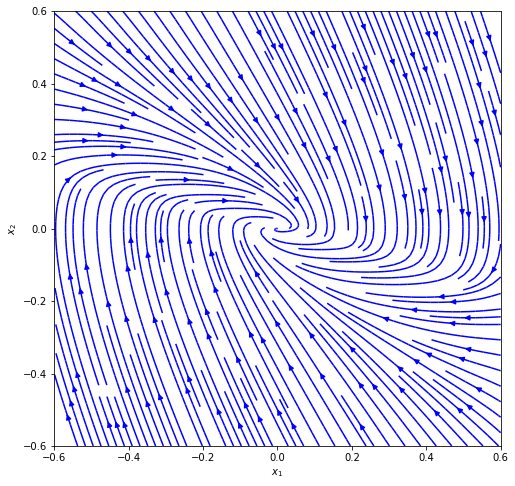

In [1003]:
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(111)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_xlim(x_min1, x_max1)
ax.set_ylim(x_min2, x_max2)
ax.grid

# Esitame trajektooride parve:
trajektoorid(x_d1, x_d2, beta_val, k_val, x_min1, x_max1, x_min2, x_max2)

plt.show()

Esitame nii lineariseeritud kui ka mittelineaarse süsteemi fikseeritud trajektoori ühel graafikul, taustaks tuttavad noolekesed:

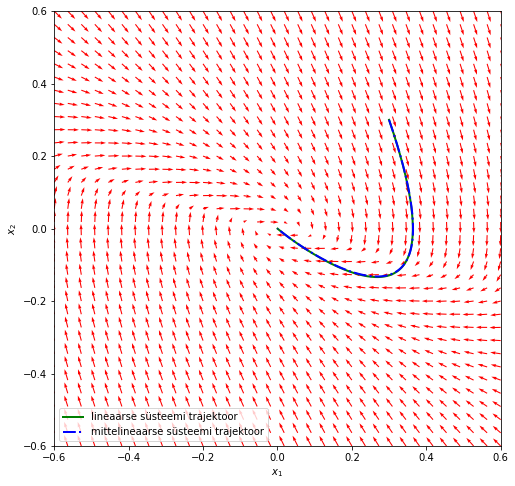

In [1004]:
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(111)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_xlim(x_min1, x_max1)
ax.set_ylim(x_min2, x_max2)
ax.grid

# Esitame analüütiliselt arvutatud trajektoori:
lineaarne(xt_k, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)                       

# Esitame numbriliselt arvutatud trajektoori:
mittelineaarne(x_d1, x_d2, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)            

# Esitame dünaamilise süsteemi faasiportree:
noolekesed(x_d1, x_d2, beta_val, k_val, x_min1, x_max1, x_min2, x_max2)

# Kuvame legendi:
ax.legend(loc = 3)

plt.show()

Näeme, et tulemused klapivad väga hästi.

Õpetlik on graafikule kanda ka süsteemi omavektori sihiga määratud joon. See moodustab separaatriksi, mis eristab lahendite piirkondi. Kui $q$ on joone parameeter ja joon läbib koordinaatide alguspunkti, siis selle võrrand on $r=qv$, kus $r$ on joone vektor (annab joone punktide koordinaadid) ning $v$ on etteantud vektor (joone puutujasihiline vektor), antud juhul maatriksi $A_k$ omavektor.

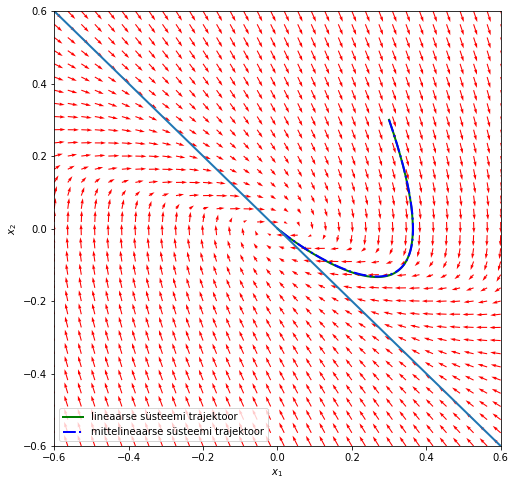

In [1005]:
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(111)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_xlim(x_min1, x_max1)
ax.set_ylim(x_min2, x_max2)
ax.grid

# Esitame analüütiliselt arvutatud trajektoori:
lineaarne(xt_k, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)                       

# Esitame numbriliselt arvutatud trajektoori:
mittelineaarne(x_d1, x_d2, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)            

# Esitame dünaamilise süsteemi faasiportree:
noolekesed(x_d1, x_d2, beta_val, k_val, x_min1, x_max1, x_min2, x_max2)

omavektor(v_1k, beta_val, k_val, x_min1, x_max1)

# Kuvame legendi:
ax.legend(loc = 3)

plt.show()

Näeme, et kõikide lahendite käitumine on sama - pendel läbib tasakaaluasendi, pöördub tagasi ning sumbub teist korda tasakaaluasendisse jõudes.

Koostame graafiku ka otsese võnkumise jaoks ehk esitame pendli nurkkauguse sõltuvuse ajast (eespool toodud parameetrite ja algtingimuste korral):

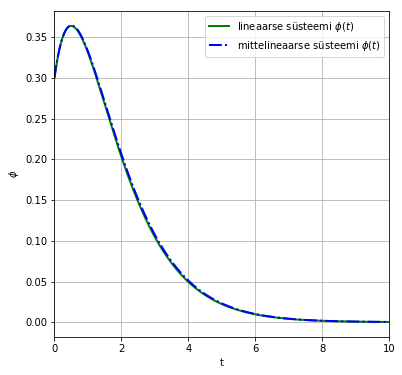

In [1006]:
fig = plt.figure(figsize = (6, 6))

ax = fig.add_subplot(111)
ax.set_xlabel("t")
ax.set_ylabel("$\phi$")
ax.set_xlim(t_min, t_max)
ax.grid()

# Esitame analüütiliselt arvutatud graafiku:
ajast_lin(xt_k, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)   

# Esitame numbriliselt arvutatud graafiku:
ajast_mittelin(x_d1, x_d2, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)

# Kuvame legendi:
ax.legend(loc = 1)

plt.show()

Võnkumise graafik on ootuspärane, kuna meil oli tingimuseks, et $\beta^2=k^2$ - hõõrdetegur on võrdne raskuskiirenduse ja pendli pikkuse suhtega ning võnkumine sumbub kiiresti.

### 2.4 Juht (4): $\beta=0$, kaks imaginaarset omaväärtust <a name="juht4"></a>

Kui $\beta=0$, siis on meil kaks erinevat imaginaarset omaväärtust ja süsteemi faasiportreeks on tsenter.

Tähistame maatriksit $A_1$ nüüd kujul $A_b$:

In [1007]:
A_b = A1.subs(beta, 0)
kuva("A_b", A_b)

<IPython.core.display.Math object>

Sel on kaks imaginaarset omaväärtust ning omavektorid $w_{b1}$ ja $w_{b2}$ on teineteise kaaskompleksid:

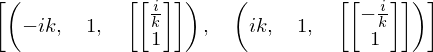

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [1008]:
# Leiame omaväärtuseid ja omavektoreid sisaldava hulga:
omav_b = list(A_b.eigenvects())
display(omav_b)

# Eraldame omaväärtused:
l1_b = omav_b[0][0]
l2_b = omav_b[1][0]
kuva("λ_{1b}", l1_b)
kuva("λ_{2b}", l2_b)

# Eraldame omavektorid:
w_1b = omav_b[0][2][0]
w_2b = omav_b[1][2][0]
kuva("w_{1b}", w_1b)
kuva("w_{2b}", w_2b)

Võtame omavektori $w_{b2}$ ja eraldame sellest reaal- ja imaginaarosad:

In [1009]:
u_b = sp.re(w_2b)
v_b = sp.im(w_2b)
kuva("u_b", u_b)
kuva("v_b", v_b)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Nende abil moodustame maatriksi $P$:

In [1010]:
# Moodustame maatriksi P:
P_b = sp.Matrix([[v_b[0], u_b[0]],
                 [v_b[1], u_b[1]]])
kuva("P_b", P_b)

# Leiame pöördmaatriksi:
P_bp = P_b**(-1)
kuva("P_b^{-1}", P_bp)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Lahendi kirjapanekuks on vaja ka omaväärtuse $\lambda_{2b}$ imaginaarosa:

In [1011]:
re_l2 = sp.re(l2_b)
im_l2 = sp.im(l2_b)
kuva("Re(λ_{2b})", re_l2)
kuva("Im(λ_{2b})", im_l2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Samuti läheb tarvis maatriksit $B$ ja algtingimuste vektorit:

In [1012]:
B_b = sp.exp(re_l2 * t) * sp.Matrix([[sp.cos(im_l2 * t), -sp.sin(im_l2 * t)],
                                  [sp.sin(im_l2 * t), sp.cos(im_l2 * t)]])
kuva("B_b", B_b)
kuva("x_{alg}", x_alg)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Lahendiks on

In [1013]:
xt_b = P_b * B_b * P_bp * x_alg
kuva("x_b(t)", xt_b)

<IPython.core.display.Math object>

Kontrollime, et lahendi vektori teine komponent on esimese tuletis:

In [1014]:
sp.simplify(xt_b[1] - sp.diff(xt_b[0], t))

#### 2.4.1 Lineariseeritud süsteemi võrdlus mittelineaarse süsteemiga <a name="lin_sys_vordlus4"></a>

Võrdleme lineariseeritud võrrandite analüütilist lahendit algse mittelineaarse võrrandi numbrilise lahendiga. Selleks määrame kõigepealt võrrandi parameetrid, lahendi algtingimused ja ajalise kestuse, mille jooksul lahendit jälgime.

In [1015]:
beta_val = 0.0
k_val = 1.5
x_01_val = 0.3
x_02_val = 0.3
t_min = 0
t_max = 10
x_min1 = -0.6
x_max1 =0.6
x_min2 = -0.6
x_max2 = 0.6

Esitame võimalike trajektooride parve antud algtingimuste korral:

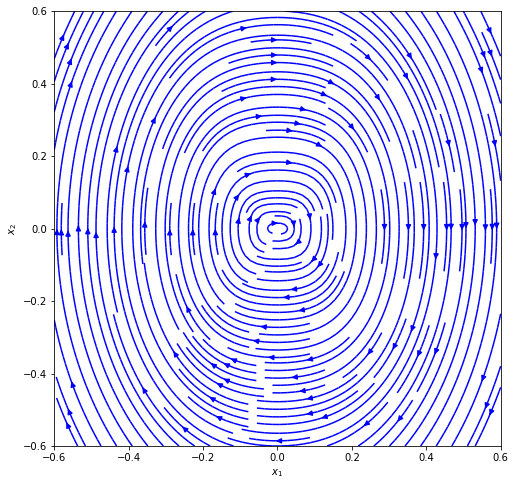

In [1016]:
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(111)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_xlim(x_min1, x_max1)
ax.set_ylim(x_min2, x_max2)
ax.grid

# Esitame trajektooride parve:
trajektoorid(x_d1, x_d2, beta_val, k_val, x_min1, x_max1, x_min2, x_max2)

plt.show()

Esitame nii lineariseeritud kui ka mittelineaarse süsteemi fikseeritud trajektoori ühel graafikul, taustaks tuttavad noolekesed:

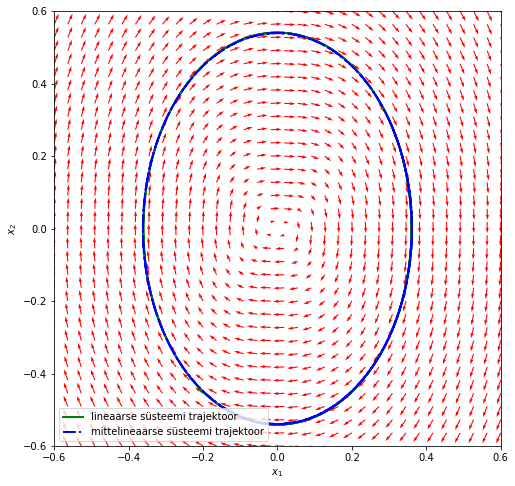

In [1017]:
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(111)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_xlim(x_min1, x_max1)
ax.set_ylim(x_min2, x_max2)
ax.grid

# Esitame analüütiliselt arvutatud trajektoori:
lineaarne(xt_b, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)                       

# Esitame numbriliselt arvutatud trajektoori:
mittelineaarne(x_d1, x_d2, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)            

# Esitame dünaamilise süsteemi faasiportree:
noolekesed(x_d1, x_d2, beta_val, k_val, x_min1, x_max1, x_min2, x_max2)

# Kuvame legendi:
ax.legend(loc = 3)

plt.show()

Näeme, et tegemist on tõepoolest tsenteriga. Pendel võngub jääva sageduse ja amplituudiga.

Koostame graafiku ka otsese võnkumise jaoks ehk esitame pendli nurkkauguse sõltuvuse ajast (eespool toodud parameetrite ja algtingimuste korral):

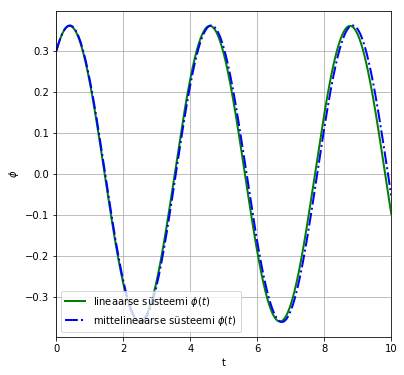

In [1018]:
fig = plt.figure(figsize = (6, 6))

ax = fig.add_subplot(111)
ax.set_xlabel("t")
ax.set_ylabel("$\phi$")
ax.set_xlim(t_min, t_max)
ax.grid()

# Esitame analüütiliselt arvutatud graafiku:
ajast_lin(xt_b, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)   

# Esitame numbriliselt arvutatud graafiku:
ajast_mittelin(x_d1, x_d2, beta_val, k_val, x_01_val, x_02_val, t_min, t_max)

# Kuvame legendi:
ax.legend(loc = 3)

plt.show()

Võnkumise graafik on ootuspärane, kuna meil oli tingimuseks, et $\beta=0$ -  hõõrdetegur on võrdne nulliga ning pendel võngub jääva sageduse ja amplituudiga.

## 3. Püsipunkt $P_2$ <a name="PP2"></a>

Lineariseerime uuritavat süsteemi nüüd püsipunkti $P_2=(\pi, 0)$ ümbruses ehk leiame lineariseeritud võrrandisüsteemi maatriksi $A_2$:

In [1019]:
# Asendame sisse x1, x2 väärtused:
A2 = A.subs([(x1, sp.pi), (x2, 0)])

# Kuvame tulemuse:
kuva("A_{P_2}", A2)

<IPython.core.display.Math object>

Leiame maatriksi $A$ omaväärtused $\lambda_1$ ja $\lambda_2$. Selleks tuleb lahendada karakteristlik võrrand $\det(A-\lambda I)=0$.

In [1020]:
# Defineerime karakteristliku võrrandi:
kar2 = sp.det(A2 - l * sp.eye(2))

# Lahendame selle:
lah2 = sp.solve(kar2, l)

# Avaldame omaväärtused:
l2_1 = lah2[0]
l2_2 = lah2[1]
kuva("λ_1", l2_1)
kuva("λ_2", l2_2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Lühidalt:

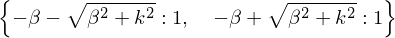

In [1021]:
A2.eigenvals()

Näeme, et lähemalt tuleb uurida vaid ühte juhtu, sest omaväärtused on alati reaalsed ja erimärgilised.

### 3.1 Juht (1): $\beta\neq0$, kaks erinevat reaalset erimärgilist omaväärtust <a name="PP2_juht1"></a>

Püsipunktis $P_2$ on meil kaks erinevat reaalset erimärgilist omaväärtust, seega tegemist on sadulaga.

Leiame maatriksi $A_2$ omavektorid:

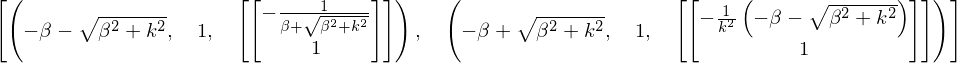

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [1022]:
# Leiame omavektoreid sisaldava hulga:
omav_A2 = A2.eigenvects()
display(omav_A2)

# Eraldame omavektorid:
v1 = omav_A2[0][2][0]
v2 = omav_A2[1][2][0]
kuva("v_1", v1)
kuva("v_2", v2)

Saadud vektorid $v_1$ ja $v_2$ on lineaarselt sõltumatud, kuna neist moodustatud maatriksi $V$ determinant ei ole null:

In [1023]:
V = sp.Matrix([[v1[0], v2[0]],
               [v1[1], v2[1]]])
kuva("V", V)
kuva("det(V)", sp.det(V).simplify())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Leiame $V$ pöördmaatriksi:

In [1024]:
V_p = (V**(-1)).applyfunc(sp.simplify)
kuva("V^{-1}", V_p)
kuva("V \cdot V^{-1}", (V * V_p).applyfunc(sp.simplify))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Defineerime normaalkujul süsteemi lahendite maatriksi $B$ ning algtingimuste vektori $y_{alg}$:

In [1025]:
# Defineerime maatriksi B:
B = sp.Matrix([[sp.exp(l2_1 * t), 0],
               [0, sp.exp(l2_2 * t)]])
kuva("B", B)

# Defineerime algtingimuste vektori y_alg:
sp.var('y_01, y_02', real = True)
y_alg = sp.Matrix([y_01, y_02])
kuva("y_{alg}", y_alg)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Lahendiks on siis vektor $y(t)=V \cdot B \cdot V^{-1} \cdot y_{alg}$:

In [1026]:
yt = (V * B * V_p * y_alg).applyfunc(sp.simplify)
kuva("y(t)", yt)

<IPython.core.display.Math object>

Antud juhul pakub põhilist huvi muidugi ainult vektori $y(t)$ esimene komponent, sest teine komponent on esimese ajaline tuletis:

In [1027]:
sp.simplify(yt[1] - sp.diff(yt[0], t))

#### 3.1.1 Lineariseeritud süsteemi võrdlus mittelineaarse süsteemiga <a name="lin_sys_vordlus5"></a>

Võrdleme lineariseeritud võrrandite analüütilist lahendit algse mittelineaarse võrrandi numbrilise lahendiga. Selleks määrame kõigepealt võrrandi parameetrid, lahendi algtingimused ja ajalise kestuse, mille jooksul lahendit jälgime.

In [1028]:
beta_val = 2.0
k_val = 1.5
y_01_val = 0.1
y_02_val = 0.4
t_min = 0
t_max = 10
y_min1 = -0.6
y_max1 =0.6
y_min2 = -0.6
y_max2 = 0.6

Oluline on, et läheme uutesse muutujatesse $y$ ehk toome püsipunkti koordinaatide alguspunkti:

In [1029]:
# Defineerime uued muutujad y1 ja y2:
sp.var("y1, y2", real = True)

# Teeme diferentsiaalvõrrandites muutujate vahetuse:
y_d1 = x_d1.subs([(x1, y1 + sp.pi), (x2, y2 + 0)])
y_d2 = x_d2.subs([(x1, y1 + sp.pi), (x2, y2 + 0)])

# Kuvame uued võrrandid:
kuva("\dot{x}_1", y_d1)
kuva("\dot{x}_2", y_d2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Esitame võimalike trajektooride parve antud algtingimuste korral:

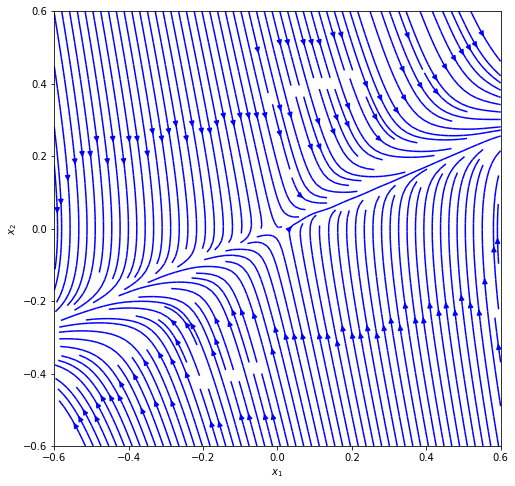

In [1030]:
# Varem defineeritud funktsioonide toimimiseks vahetame uute muutujate
# sümbolid vanade vastu:
y_d1 = y_d1.subs([(y1, x1), (y2, x2)])
y_d2 = y_d2.subs([(y1, x1), (y2, x2)])
yt = yt.subs([(y_01, x_01), (y_02, x_02)])

# Joonistame graafiku:

fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(111)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
#ax.set_xlim(x_min1, x_max1)
#ax.set_ylim(x_min2, x_max2)
ax.grid

# Esitame trajektooride parve:
trajektoorid(y_d1, y_d2, beta_val, k_val, y_min1, y_max1, y_min2, y_max2)

plt.show()

Esitame nii lineariseeritud kui ka mittelineaarse süsteemi fikseeritud trajektoori ühel graafikul, taustaks tuttavad noolekesed:

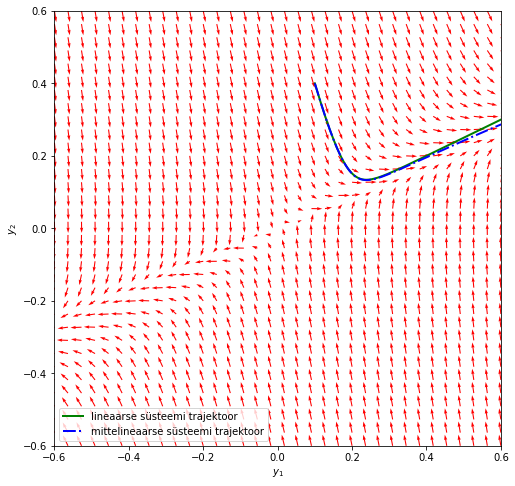

In [1031]:
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(111)
ax.set_xlabel("$y_1$")
ax.set_ylabel("$y_2$")
ax.set_xlim(y_min1, y_max1)
ax.set_ylim(y_min2, y_max2)
ax.grid

# Esitame analüütiliselt arvutatud trajektoori:
lineaarne(yt, beta_val, k_val, y_01_val, y_02_val, t_min, t_max)                       

# Esitame numbriliselt arvutatud trajektoori:
mittelineaarne(y_d1, y_d2, beta_val, k_val, y_01_val, y_02_val, t_min, t_max)            

# Esitame dünaamilise süsteemi faasiportree:
noolekesed(y_d1, y_d2, beta_val, k_val, y_min1, y_max1, y_min2, y_max2)

# Kuvame legendi:
ax.legend(loc = 3)

plt.show()

Näeme, et tulemused klapivad suhteliselt hästi.

Õpetlik on graafikule kanda ka lineariseeritud süsteemi omavektorite sihiga määratud jooned:

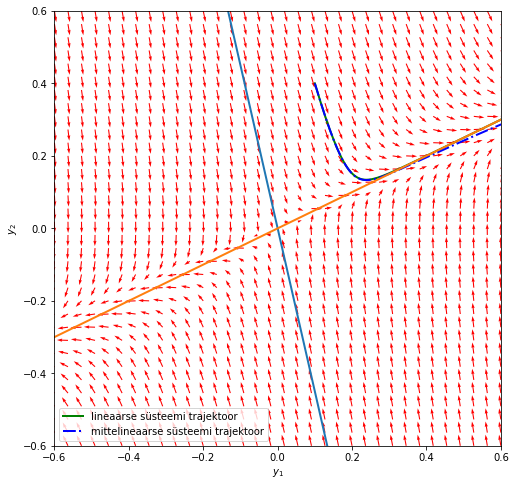

In [1032]:
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(111)
ax.set_xlabel("$y_1$")
ax.set_ylabel("$y_2$")
ax.set_xlim(y_min1, y_max1)
ax.set_ylim(y_min2, y_max2)
ax.grid

# Esitame analüütiliselt arvutatud trajektoori:
lineaarne(yt, beta_val, k_val, y_01_val, y_02_val, t_min, t_max)                       

# Esitame numbriliselt arvutatud trajektoori:
mittelineaarne(y_d1, y_d2, beta_val, k_val, y_01_val, y_02_val, t_min, t_max)            

# Esitame dünaamilise süsteemi faasiportree:
noolekesed(y_d1, y_d2, beta_val, k_val, y_min1, y_max1, y_min2, y_max2)

# Esitame omavektorite sihilised jooned:
omavektor(v1, beta_val, k_val, y_min1, y_max1)
omavektor(v2, beta_val, k_val, y_min1, y_max1)

# Kuvame legendi:
ax.legend(loc = 3)

plt.show()

Koostame graafiku ka otsese võnkumise jaoks ehk esitame pendli nurkkauguse sõltuvuse ajast (eespool toodud parameetrite ja algtingimuste korral):

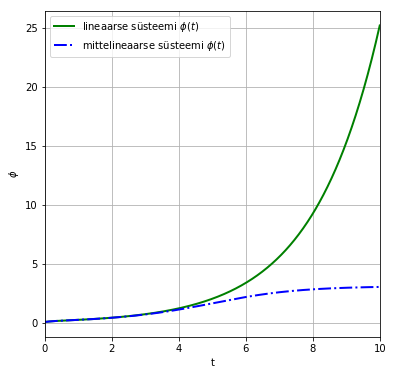

In [1033]:
fig = plt.figure(figsize = (6, 6))

ax = fig.add_subplot(111)
ax.set_xlabel("t")
ax.set_ylabel("$\phi$")
ax.set_xlim(t_min, t_max)
ax.grid()

# Esitame analüütiliselt arvutatud graafiku:
ajast_lin(yt, beta_val, k_val, y_01_val, y_02_val, t_min, t_max)   

# Esitame numbriliselt arvutatud graafiku:
ajast_mittelin(y_d1, y_d2, beta_val, k_val, y_01_val, y_02_val, t_min, t_max)

# Kuvame legendi:
ax.legend(loc = 2)

plt.show()

Nurkkauguse graafik paljastab juba suurema erinevuse analüütilise lahendi ja numbrilise lahendi vahel. See graafik ilmestab siiski püsipunkti $P_2$ füüsikalist sisu - tegemist on ebastabiilse tasakaaluasendiga ehk selles punktis on pendel üleval / tagurpidi.

## 4. Lahendite käitumine püsipunktidest eemal <a name="eemal"></a>

Vaatame ühte näidet, kuidas püsipunkti lähedal lineariseeritud süsteemi lahend erineb algse mittelineaarse süsteemi lahendist püsipunktist eemal.

Määrame võrrandi parameetrid ja lahendi algtingimused ning ajalise kestuse, mille jooksul lahendit jälgime:

In [1034]:
beta_val = 0.5
k_val = 1.5
x_01_val = 0.3
x_02_val = 0.3
t_min = -5
t_max = 10
x_min1 = -20.0
x_max1 = 20.0
x_min2 = -20.0
x_max2 = 20.0

Esitame võimalike trajektooride parve antud algtingimuste korral:

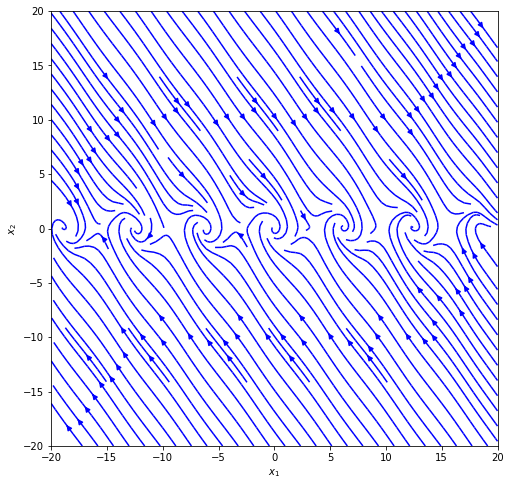

In [1035]:
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(111)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_xlim(x_min1, x_max1)
ax.set_ylim(x_min2, x_max2)
ax.grid

# Esitame trajektooride parve:
trajektoorid(x_d1, x_d2, beta_val, k_val, x_min1, x_max1, x_min2, x_max2)

plt.show()

Esitame nii lineaariseeritud kui ka mittelineaarse süsteemi fikseeritud trajektoori ühel graafikul, taustaks tuttavad noolekesed: Seekord aga liigume ajas tagasi ehk arvutame / integreerime suunal $t_{max}\rightarrow t_{min}$:

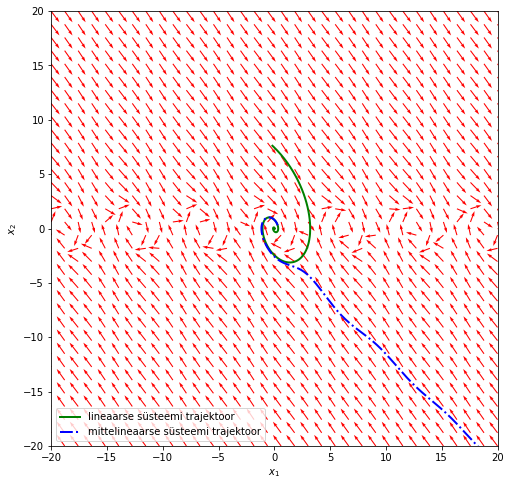

In [1036]:
fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(111)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_xlim(x_min1, x_max1)
ax.set_ylim(x_min2, x_max2)
ax.grid

# Esitame analüütiliselt arvutatud trajektoori:
lineaarne(xt_c, beta_val, k_val, x_01_val, x_02_val, t_max, t_min)                       

# Esitame numbriliselt arvutatud trajektoori:
mittelineaarne(x_d1, x_d2, beta_val, k_val, x_01_val, x_02_val, t_max, t_min)            

# Esitame dünaamilise süsteemi faasiportree:
noolekesed(x_d1, x_d2, beta_val, k_val, x_min1, x_max1, x_min2, x_max2)

# Kuvame legendi:
ax.legend(loc = 3)

plt.show()

Näeme, et ajas tagasi minnes hakkavad lahendid oluliselt erinema.

Koostame graafiku ka otsese võnkumise jaoks ehk esitame pendli nurkkauguse sõltuvuse ajast (eespool toodud parameetrite ja algtingimuste korral):

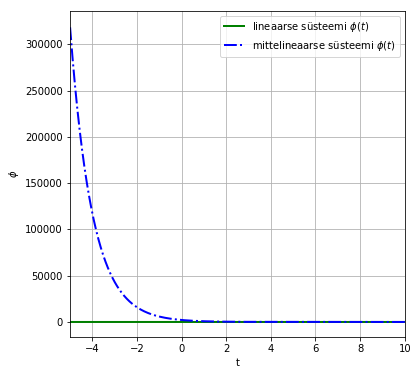

In [1037]:
fig = plt.figure(figsize = (6, 6))

ax = fig.add_subplot(111)
ax.set_xlabel("t")
ax.set_ylabel("$\phi$")
ax.set_xlim(t_min, t_max)
ax.grid()

# Esitame analüütiliselt arvutatud graafiku:
ajast_lin(xt_c, beta_val, k_val, x_01_val, x_02_val, t_max, t_min)   

# Esitame numbriliselt arvutatud graafiku:
ajast_mittelin(x_d1, x_d2, beta_val, k_val, x_01_val, x_02_val, t_max, t_min)

# Kuvame legendi:
ax.legend(loc = 1)

plt.show()

## 5. Lisa: kolmemõõtmelised graafikud <a name="kolme"></a>

Uurime, kuidas joonistada kolmemõõtmelise süsteemi faasiportreed ja trajektoori faasiruumis. Selleks vaatame näiteks süsteemi

$$\begin{cases}
\dot{x}=-y-z,\\
\dot{y}=x+y,\\
\dot{z}=-1+xz.
\end{cases}$$

Defineerime selle dünaamilise süsteemi Pythoni keeles:

In [1038]:
# Defineerime muutujad:
sp.var('x, y ,z')

# Defineerime võrrandid:
xd = -y - z
yd = x + y
zd = 1 + x*z

Joonistame kolmemõõtmelise faasiportree:

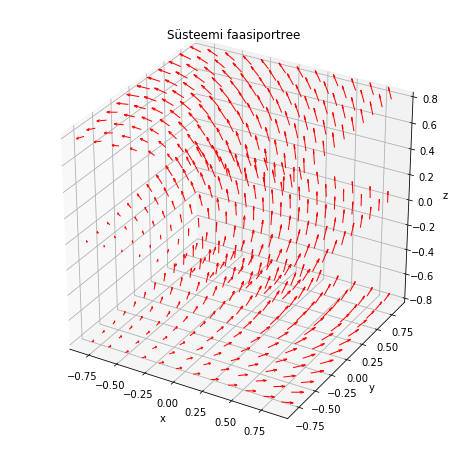

In [1039]:
# Impordime vajaliku paketi:
from mpl_toolkits.mplot3d import Axes3D

# Muudame võrrandid numpy funktsioonideks:
xd_np = sp.lambdify((x,y,z), xd, 'numpy')
yd_np = sp.lambdify((x,y,z), yd, 'numpy')
zd_np = sp.lambdify((x,y,z), zd, 'numpy')

# Koostame punktide võrgustiku:
xp, yp, zp = np.meshgrid(np.arange(-0.8, 1, 0.15),
                         np.arange(-0.8, 1, 0.15),
                         np.arange(-0.8, 1, 0.8))

# Leiame tuletised igas punktis:
DX = xd_np(xp, yp, zp)
DY = yd_np(xp, yp, zp)
DZ = zd_np(xp, yp, zp)
    
#Joonistame graafiku:

fig = plt.figure(figsize = (8, 8))
ax = fig.gca(projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")    
ax.set_title("Süsteemi faasiportree")
ax.quiver(xp, yp, zp, DX, DY, DZ, lw=1, length = 0.1, normalize = True, color='red')

plt.show()

Joonistame ka ühe võimaliku trajektoori kolmemõõtmelises faasiruumis:

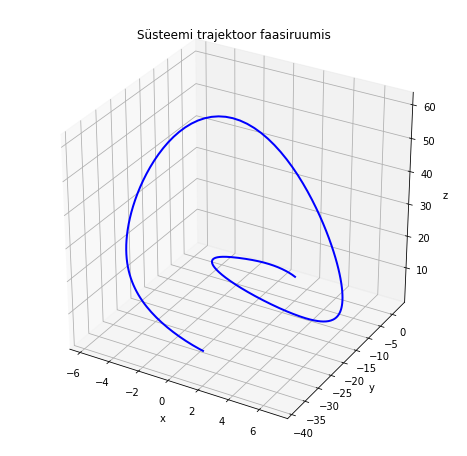

In [1040]:
# Defineerime uuritava süsteemi funktsioonina:
def systeem(S, N):
    xd = xd_np(S[0], S[1], S[2])
    yd = yd_np(S[0], S[1], S[2])
    zd = zd_np(S[0], S[1], S[2]) 
    dSdN = [xd, yd, zd]
    return dSdN

# Määrame algpunkti, ajavahemiku ja ajasammu:
x0 = 1.0
y0 = 1.0
z0 = 1.0
t0 = 0.0
t1 = 5.0
dt = 0.01

# Leiame ajasammude arvu:
n = (int)(t1 / dt)

# Arvutame ajahekted:
N = np.linspace(t0, t1, n + 1)

# Defineerime algpunkti:
S0 = (x0, y0, z0)

# Integreerime süsteemi numbriliselt:
sol = odeint(systeem, S0, N)
      
# Eraldame lahendid:
sol_x = sol[:, 0]
sol_y = sol[:, 1]
sol_z = sol[:, 2]
      
      
#Joonistame graafiku:

fig = plt.figure(figsize = (8, 8))
ax = fig.gca(projection = '3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Süsteemi trajektoor faasiruumis")
ax.plot(sol_x, sol_y, sol_z, lw = 2, color = 'b')

plt.show()